In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Mengambil dataset
df = pd.read_csv('/content/META.csv')

# Menampilkan kolom data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
1,2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2,2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
3,2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
4,2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000


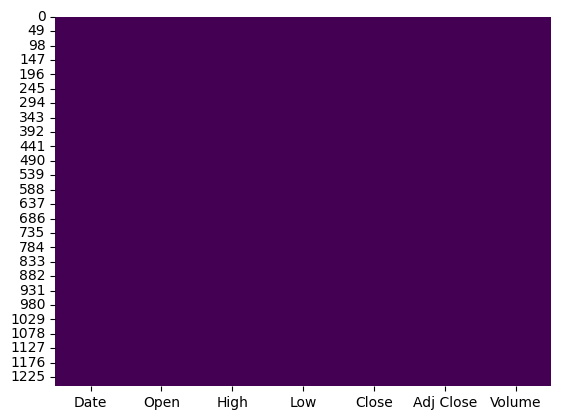

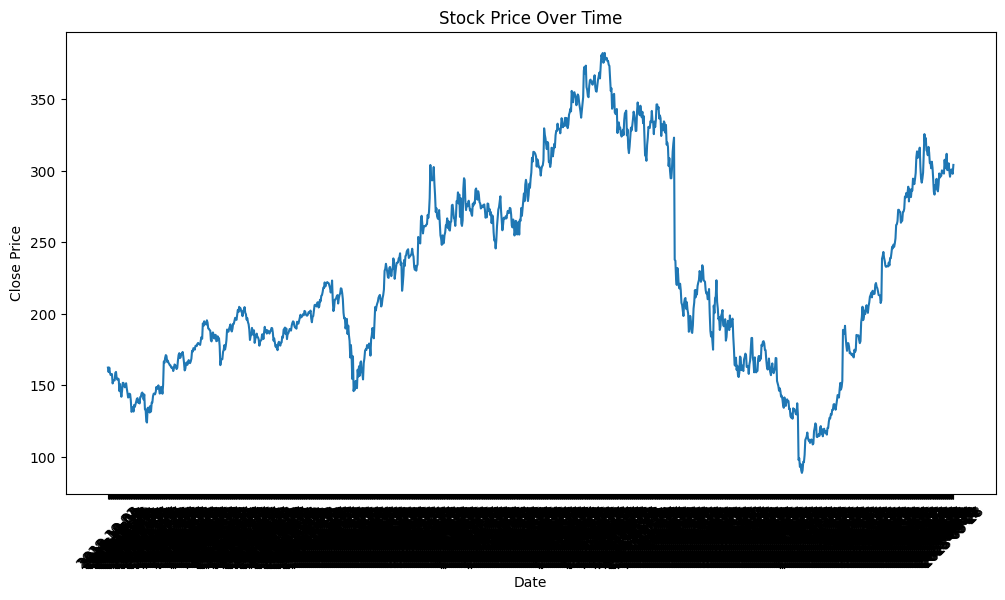

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,226.576730,229.858075,223.490947,226.683676,226.683676,2.386389e+07
std,68.874666,69.403375,68.204459,68.817994,68.817994,1.560486e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,174.339996,176.490005,171.580002,174.279999,174.279999,1.514170e+07
50%,208.669998,211.600006,206.509995,209.529999,209.529999,2.021550e+07
75%,279.079987,285.190002,276.220001,280.820007,280.820007,2.803020e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [17]:
# Menampilkan Missing Value
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Menampilkan pergerakan saham
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

df.describe()

In [18]:
# Ubah kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set kolom Date sebagai index
df.set_index('Date', inplace=True)

# Buat kolom baru untuk moving average (misalnya, 7 hari)
df['7_day_avg'] = df['Close'].rolling(window=7).mean()

# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close', '7_day_avg']])

# Persiapkan data untuk pelatihan
X = []
y = []

# Tentukan jumlah langkah waktu (periode melihat)
lookback = 60  # 60 hari melihat ke belakang

for i in range(lookback, len(df)):
    X.append(scaled_data[i-lookback:i, 0])  # Harga 'Close'
    y.append(scaled_data[i, 0])  # Harga 'Close' (target)

X = np.array(X)
y = np.array(y)

# Ubah bentuk X agar sesuai dengan input model RNN, LSTM, GRU
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [20]:
# Membangun model RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(units=1))

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
rnn_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1099
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0020
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0012
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0013
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 9.4629e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.3807e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.7734e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.0277e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.7641e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.9312e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.5515e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.0637e-04
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 

In [21]:
# Membangun model LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0681
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0039
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0025
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0023
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0019
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0018
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0018
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0018
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0015
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0015
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0014
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0018
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0013
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0014
Epoc

In [22]:
# Membangun model GRU
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))

gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Latih model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.1366
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0064
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0013
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 8.3068e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 7.6249e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 9.7752e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7.0217e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 9.5146e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 8.2778e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 6.8040e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 6.9787e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 6.5113e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 7.6610e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 6.5393e-04
Epoch 15/20
30/30 ━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


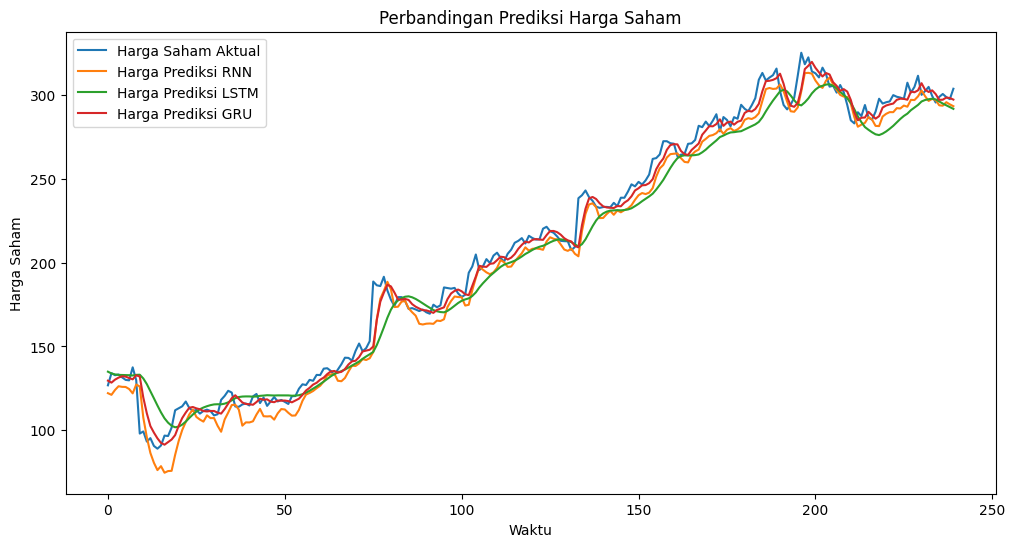

MSE RNN: 99.79377599927787
MSE LSTM: 151.3043005574762
MSE GRU: 49.26872744357176


In [26]:
# Prediksi harga saham dengan masing-masing model
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)
gru_pred = gru_model.predict(X_test)

# Kolom dummy yang akan ditambahkan
dummy_column = np.zeros_like(rnn_pred)
rnn_pred_with_dummy = np.concatenate([rnn_pred, dummy_column], axis=1)
lstm_pred_with_dummy = np.concatenate([lstm_pred, dummy_column], axis=1)
gru_pred_with_dummy = np.concatenate([gru_pred, dummy_column], axis=1)

# Transformasi pada prediksi dan nilai
rnn_pred_inverse = scaler.inverse_transform(rnn_pred_with_dummy)[:, 0]  # Extract original 'Close' predictions
lstm_pred_inverse = scaler.inverse_transform(lstm_pred_with_dummy)[:, 0]  # Extract original 'Close' predictions
gru_pred_inverse = scaler.inverse_transform(gru_pred_with_dummy)[:, 0]  # Extract original 'Close' predictions

y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), dummy_column], axis=1))[:, 0]

# Plot perbandingan prediksi dengan nilai aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Harga Saham Aktual')
plt.plot(rnn_pred_inverse, label='Harga Prediksi RNN')
plt.plot(lstm_pred_inverse, label='Harga Prediksi LSTM')
plt.plot(gru_pred_inverse, label='Harga Prediksi GRU')
plt.title('Perbandingan Prediksi Harga Saham')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.show()

# Menghitung Mean Squared Error untuk setiap model
from sklearn.metrics import mean_squared_error
rnn_mse = mean_squared_error(y_test_inverse, rnn_pred_inverse)
lstm_mse = mean_squared_error(y_test_inverse, lstm_pred_inverse)
gru_mse = mean_squared_error(y_test_inverse, gru_pred_inverse)

print(f"MSE RNN: {rnn_mse}")
print(f"MSE LSTM: {lstm_mse}")
print(f"MSE GRU: {gru_mse}")